In [1]:
import pandas as pd
import os
import numpy as np

frames = []
datasets = r'D:\Work\Avtaar\ML Assignment 2\datasets'
for filename in os.listdir(datasets):
    file = os.path.join(datasets, filename)
    frames.append(pd.read_csv(file))

df = pd.concat(frames)

#print(df['Start_Time'].where(df['Start_Time'] == 'Start_Time').dropna().index)

df = df.drop(df['Start_Time'].where(df['Start_Time'] == 'Start_Time').dropna().index)


In [2]:
city_group = df.groupby('City')

city_group_dict = city_group.groups

cities = list(city_group_dict.keys())

count = list(map(len, city_group_dict.values()))

accident_count = dict(zip(cities, count))

max_accident_city = list(accident_count.keys())[list(accident_count.values()).index(max(accident_count.values()))]

print(max_accident_city)

Houston


In [3]:
times = df['Start_Time'].apply(lambda x: x.split(" ")[-1])
hours = times.apply(lambda x: int(x.split(':')[0]))

bad_index = hours.where(hours > 23).dropna().index
hours.where(hours <= 23, 0, inplace=True)
df['hours'] = hours

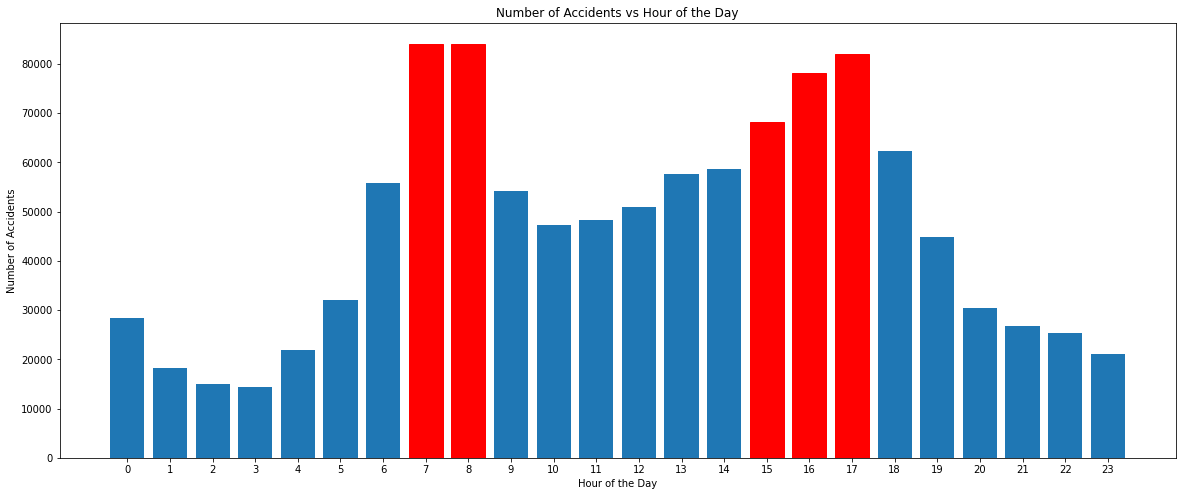

In [4]:
hour_grp = df.groupby('hours')

accidents = np.zeros(24)
hour_list = np.arange(0, 24)

acc_dict = {}

for h in hour_list:
    acc_dict[h] = hour_grp.get_group(h).size

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,8)

barlist = plt.bar(list(acc_dict.keys()), list(acc_dict.values()))
plt.ylabel('Number of Accidents')
plt.xlabel('Hour of the Day')
plt.title('Number of Accidents vs Hour of the Day')
plt.xticks(range(0,24))
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[15].set_color('r')
barlist[16].set_color('r')
barlist[17].set_color('r')


plt.show()

In [5]:
dates = df['Start_Time'].apply(lambda x: x.split(" ")[0])

dates = dates.apply(lambda x: x.split('-'))
dates_list = dates.values
dates_list = [x if len(x) == 3 else None for x in dates_list]
dates = pd.Series(dates_list)
years = dates.dropna().apply(lambda x: x[2])

df['years'] = years

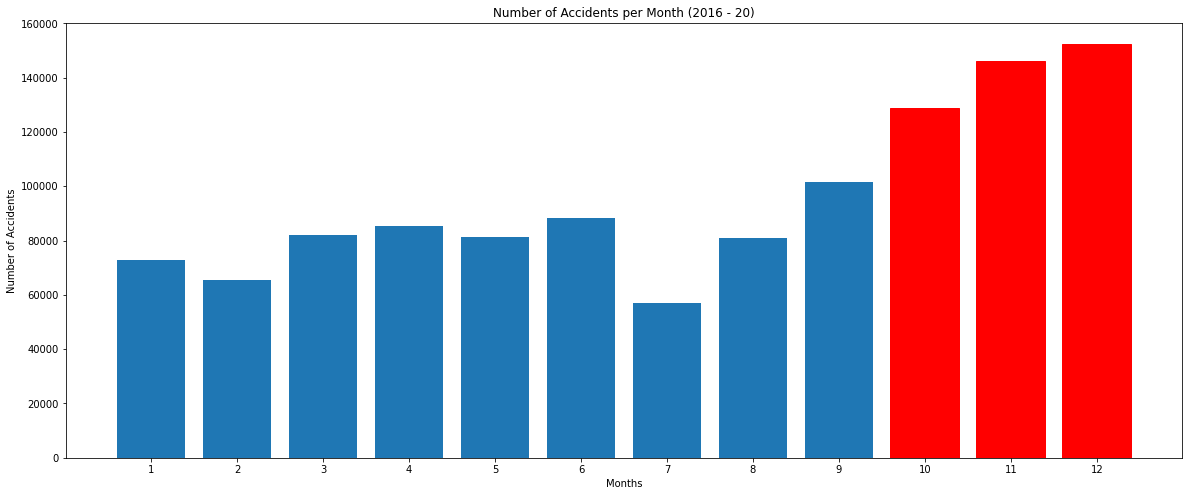

In [6]:
months = dates.dropna().apply(lambda x: x[1])

df['months'] = pd.to_numeric(months)

months_grp = df.groupby('months')

acc_dict_by_month = {}

for month in range(1, 13):
    acc_dict_by_month[month] = months_grp.get_group(month).size

barlist = plt.bar(list(acc_dict_by_month.keys()), list(acc_dict_by_month.values()))
plt.xticks(range(1, 13))
plt.xlabel('Months')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month (2016 - 20)')
for bar in barlist[9:12]: bar.set_color('r')
plt.show()

https://www.houstoninjurylawyer.com/top-causes-winter-car-accidents/